NUMPY

4.2\. Find the outer product of the following two vecotrs (10 MINUTES)

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [1]:
import numpy as np

In [2]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

out_np=np.outer(u,v)
print("Output with numpy function:\n", out_np)

out_list_compr=np.array([x*y for x in u for y in v]).reshape(4,4)
print("Output with list_comprehension:\n", out_list_compr)

out_for_loop=[]
for x in u:
    for y in v:
        out_for_loop.append(x*y)
out_for_loop=np.array(out_for_loop).reshape(4,4)
print("Output with for loop:\n", out_for_loop)

u=np.array([u,])
out_broad=(u.T)*v
print("Output with broadcasting:\n", out_broad)

Output with numpy function:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Output with list_comprehension:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Output with for loop:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Output with broadcasting:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


4.4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (inclusive). (10 MINUTES)

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

In [4]:
import numpy as np
import matplotlib.pyplot as plt

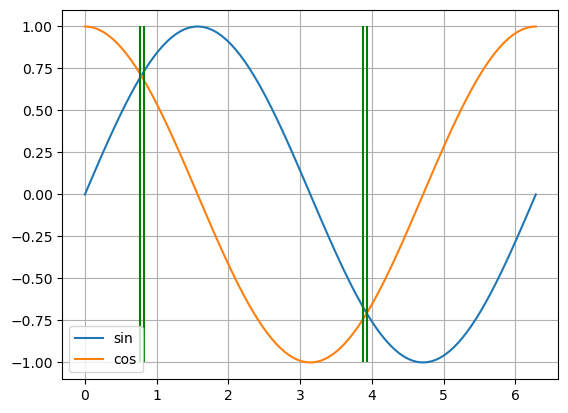

In [5]:
N=100
x=np.linspace(0, 2*np.pi, N)
#print(x)

x_extract=x[0:N:9]
#print(x_extract)

x_reversed=x[::-1]
#print(x_reversed)

x_mask=x[np.abs(np.sin(x)-np.cos(x))<0.1]
#print(x_mask)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.grid()
plt.vlines(x_mask, -1, 1, color='g')
plt.legend(['sin', 'cos'])
plt.show()


4.6\. Use broadcasting to create a grid of distances (15 MINUTES)

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [7]:
import numpy as np

In [13]:
positions_miles=np.array([[0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448],])
conversion=1.6 # miles to kms

distances_miles=positions_miles-positions_miles.T
#distances_miles=[i-j for i in positions_miles for j in positions_miles]
#distances_miles=np.array(distances_miles).reshape(len(positions_miles), len(positions_miles))

distances_km=distances_miles*conversion
print(distances_km)


[[    0.    316.8   484.8  1177.6  1393.6  1880.   2360.   2470.4  3060.8
   3916.8]
 [ -316.8     0.    168.    860.8  1076.8  1563.2  2043.2  2153.6  2744.
   3600. ]
 [ -484.8  -168.      0.    692.8   908.8  1395.2  1875.2  1985.6  2576.
   3432. ]
 [-1177.6  -860.8  -692.8     0.    216.    702.4  1182.4  1292.8  1883.2
   2739.2]
 [-1393.6 -1076.8  -908.8  -216.      0.    486.4   966.4  1076.8  1667.2
   2523.2]
 [-1880.  -1563.2 -1395.2  -702.4  -486.4     0.    480.    590.4  1180.8
   2036.8]
 [-2360.  -2043.2 -1875.2 -1182.4  -966.4  -480.      0.    110.4   700.8
   1556.8]
 [-2470.4 -2153.6 -1985.6 -1292.8 -1076.8  -590.4  -110.4     0.    590.4
   1446.4]
 [-3060.8 -2744.  -2576.  -1883.2 -1667.2 -1180.8  -700.8  -590.4     0.
    856. ]
 [-3916.8 -3600.  -3432.  -2739.2 -2523.2 -2036.8 -1556.8 -1446.4  -856.
      0. ]]


4.7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask). (20 MINUTES)
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)
  

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
N=100

def prime_calculator(N):
    numbers=np.arange(N)
    mask=np.ones(N, dtype=bool)

    for i in range (2, N):
        for j in range (2, N//2):
            if i*j<N:
                mask[i*j]=False

    primes=numbers[mask]
    return primes

print(prime_calculator(N))

[ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]


In [16]:
#Eratostene sieve

N=100
x=np.arange(N)

def sieve(x,p=2):
    x=x[(x%p!=0)|(x==p)]
    end=x[-1]
    if p<end:
        p=x[x>p].min()
        sieve(x, p)
    elif p==end:
        print(x)
        
        
sieve(x)

[ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]


In [17]:
N=[10, 50, 100, 500, 1000, 2000, 5000, 10000]

for i in N:
    %timeit prime_calculator(i)

17.6 µs ± 1.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
236 µs ± 21.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
727 µs ± 88.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
14.3 ms ± 170 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
61.6 ms ± 440 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
270 ms ± 8.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.64 s ± 8.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.91 s ± 465 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


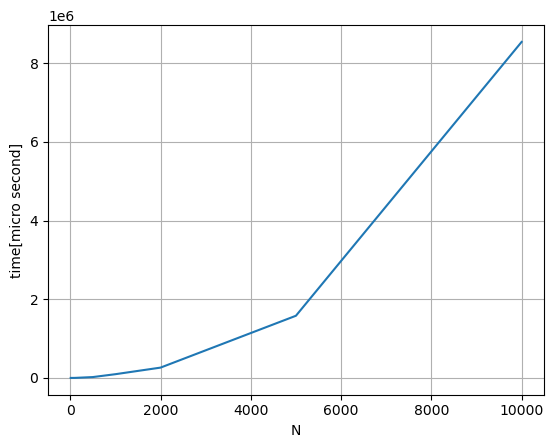

In [18]:
times=[25.2, 198, 698, 21700, 94700, 262000, 1580000, 8540000]
plt.plot(N, times)
plt.grid()
plt.xlabel('N')
plt.ylabel('time[micro second]')
plt.show()

4.8\. Diffusion using random walk (30 MINUTES)

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [19]:
import numpy as np
import matplotlib.pyplot as plt

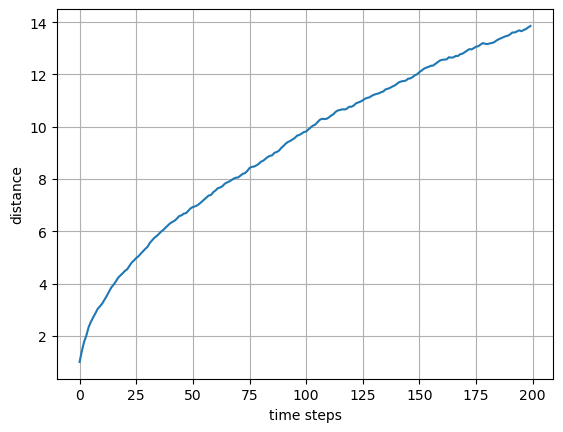

In [20]:
N=1000
n=200
steps=np.random.randint(-1, 1, (N,n))*2+1

distances=np.cumsum(steps, axis=1)

square=distances**2

means=np.mean(square, axis=0)

avarage_distance=np.sqrt(means)

time=np.arange(n)

plt.plot(time, avarage_distance)
plt.grid()
plt.xlabel('time steps')
plt.ylabel('distance')
plt.show()


4.9\. Analyze a data file (15 MINUTES)
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

In [21]:
data=np.loadtxt('populations.txt')
print(data)

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


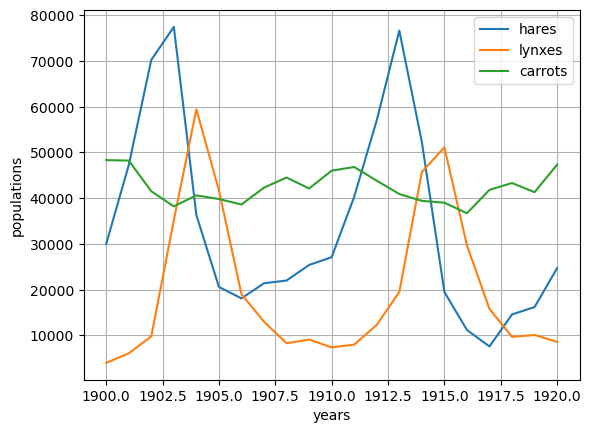

In [23]:
years=data[:,0]
hares=data[:, 1]
lynxes=data[:,2]
carrots=data[:, 3]

plt.plot(years, hares)
plt.plot(years, lynxes)
plt.plot(years, carrots)
plt.grid()
plt.legend(['hares', 'lynxes', 'carrots'])
plt.xlabel('years')
plt.ylabel('populations')
plt.show()


In [24]:
hares_mean=np.mean(hares)
hares_std=np.std(hares)
print('Hares mean, std:', hares_mean, hares_std)

lynxes_mean=np.mean(lynxes)
lynxes_std=np.std(lynxes)
print('Linxes mean, std:', lynxes_mean, lynxes_std)

carrots_mean=np.mean(carrots)
carrots_std=np.std(carrots)
print('carrots mean and std:', carrots_mean, carrots_std)

print('Correlation coefficients between hares and lynxes:')
print(np.corrcoef(hares, lynxes))

Hares mean, std: 34080.95238095238 20897.906458089667
Linxes mean, std: 20166.666666666668 16254.591536908763
carrots mean and std: 42400.0 3322.5062255844787
Correlation coefficients between hares and lynxes:
[[1.         0.07189206]
 [0.07189206 1.        ]]


In [25]:
for i in range(len(years)):
    if hares[i]>lynxes[i] and hares[i]>carrots[i]:
        print(int(years[i]), 'hares')
    elif lynxes[i]>carrots[i]:
        print(int(years[i]), 'lynxes')
    else:
        print(int(years[i]), 'carrots')

1900 carrots
1901 carrots
1902 hares
1903 hares
1904 lynxes
1905 lynxes
1906 carrots
1907 carrots
1908 carrots
1909 carrots
1910 carrots
1911 carrots
1912 hares
1913 hares
1914 hares
1915 lynxes
1916 carrots
1917 carrots
1918 carrots
1919 carrots
1920 carrots


OSEMN

5.4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number (20 MINUTES).

Each line correspond to a credit card number.

Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [26]:
import numpy as np
import pandas as pd

In [27]:
with open('credit_card.dat', 'rb') as file:
    data=file.readlines()

In [28]:
for lines in data:
    for i in range(int((len(lines)-4)/6)):
        print(chr(int(lines[i*6:(i*6+6)], 2)), end='')
    print('\n')
        

7648 5673 3775 2271

3257 8247 3354 2266

2722 0001 4011 6652

0661 3063 3742 3150

0432 1608 1462 4742

5827 2027 8785 7303

5774 8528 2087 1117

8140 1210 6352 2845

5764 1133 7301 7100

6456 1737 4126 6726

1228 8631 7382 0000

7051 0160 5374 3166

0618 3587 1630 6376

1545 5454 7444 5636

6735 3116 3202 6834

7287 5011 1547 8413

7033 2607 3328 4200

2568 5244 1874 5024

1684 2253 7570 7118

0672 2576 0575 6631

6332 8353 8787 1340

1813 3361 1175 4211

2477 6450 8840 2368

5512 3505 2563 1326

3083 7882 0621 0025

4521 5148 8045 0334

7563 3654 8713 5787

8324 2664 0476 5561

0565 2504 7168 3510

5107 5507 1767 0738

2462 1821 2448 1443

2788 0638 6861 6554

5851 5873 5474 0547

0670 1004 4013 2655

5874 5506 3048 0806

2805 5401 8462 1260

5083 8406 6310 1862

1076 1445 3013 2266

8440 4804 4844 5277

4758 6141 0686 1387

7586 0675 0315 2568

2544 1258 7432 5165

3474 5023 4434 5626

1410 0270 0434 5086

7315 4446 1104 4215

0224 7742 8300 0266

0170 2700 3145 0640

2006 2437 805

PANDAS

## Pandas analysis (60 MINUTES)

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
file='~/Scrivania/data/data_000637.txt'
#N=50000
df=pd.read_csv(file)
df

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns]

In [31]:
max_BX=np.max(df['BX_COUNTER'])
print(max_BX)

3563


In [32]:
TDC_to_ns=25/30
BX_to_ns=25
ORBIT_to_BX=max_BX
ORBIT_to_ns=ORBIT_to_BX*BX_to_ns

In [33]:
times=df['ORBIT_CNT']*ORBIT_to_ns+df['BX_COUNTER']*BX_to_ns+df['TDC_MEAS']*TDC_to_ns
time_duration=np.max(times)-np.min(times)
print(time_duration)

980141153.3125


In [34]:
df['TIMES']=times
df

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

                TIMES  
0        3.446490e+14  
1        3.446490e+14  
2        3.446490e+14  
3        3.446490e+14  
4        3.446490e+14  
...               ...  
1310715  3.446500e+14  
1310716  3.446500e+14  
1310717  3.446500e+14  
1310718  3.446500e+14  
1310719  3.446500e+14  

[1310720 rows x 7 columns]

In [35]:
df['HEAD']=np.random.randint(0,2, (len(df)))
df

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           0     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           0     0           64  3869200167        2558        19   
4           0     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     0     1            4  3869211171         763        11   
1310717     0     0           64  3869211171         764         0   
1310718     0     0          139  3869211171         769         0   
1310719     0     0           61  3869211171         762        18   

                TIMES  
0        3.446490e+14  
1        3.446490e+14  
2        3.446490e+14  
3        3.446490e+14  
4        3.446490e+14  
...               ...  
1310715  3.446500e+14  
1310716  3.446500e+14  
1310717  3.446500e+14  
1310718  3.446500e+14  
1310719  3.446500e+14  

[1310720 rows x 7 columns]

In [36]:
df_1=df[df['HEAD']==1]
df_1

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
7           1     0          139  3869200167        2776         0   
8           1     0           62  3869200167        2774        21   
9           1     0           60  3869200167        2788         7   
...       ...   ...          ...         ...         ...       ...   
1310711     1     1           39  3869211171         430         0   
1310712     1     1           35  3869211171         429         4   
1310713     1     0           64  3869211171         758        18   
1310714     1     0           60  3869211171         762         2   
1310715     1     0           62  3869211171         762        14   

                TIMES  
1        3.446490e+14  
2        3.446490e+14  
7        3.446490e+14  
8        3.446490e+14  
9        3.446490e+14  
...               ...  
1310711  3.446500e+14  
1310712  3.446500e+14  
1310713  3.446500e+14  
1310714  3.446500e+14  
1310715  3.446500e+14  

[655376 rows x 7 columns]

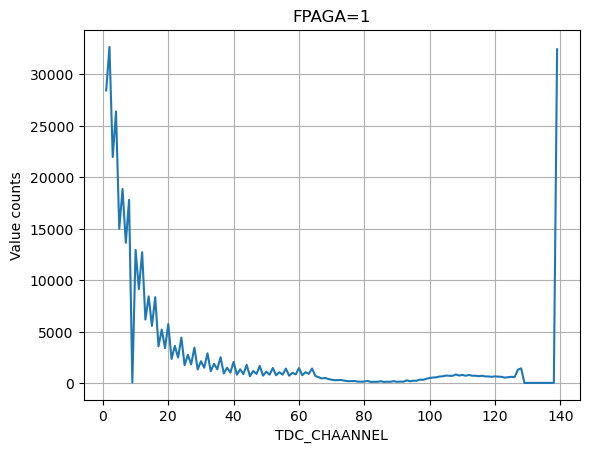

In [37]:
plt.plot(df[df['FPGA']==1]['TDC_CHANNEL'].value_counts().sort_index())
plt.grid()
plt.xlabel('TDC_CHAANNEL')
plt.ylabel('Value counts')
plt.title('FPAGA=1')
plt.show()


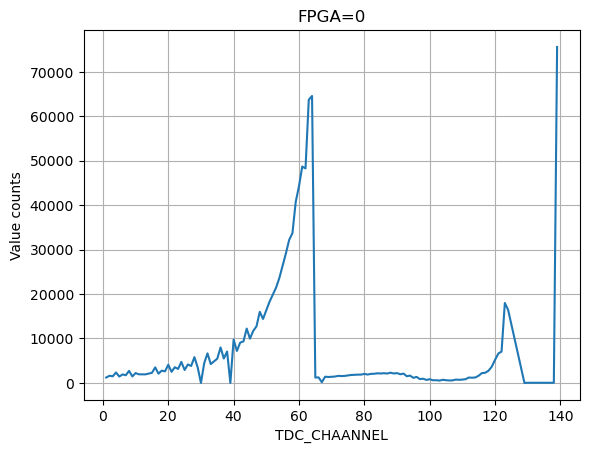

In [38]:
plt.plot(df[df['FPGA']==0]['TDC_CHANNEL'].value_counts().sort_index())
plt.grid()
plt.xlabel('TDC_CHAANNEL')
plt.ylabel('Value counts')
plt.title('FPGA=0')
plt.show()

In [39]:
df.groupby(['TDC_CHANNEL']).size().sort_values(ascending=False)[:3]

TDC_CHANNEL
139    108059
64      66020
63      64642
dtype: int64

In [40]:
df

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           0     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           0     0           64  3869200167        2558        19   
4           0     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     0     1            4  3869211171         763        11   
1310717     0     0           64  3869211171         764         0   
1310718     0     0          139  3869211171         769         0   
1310719     0     0           61  3869211171         762        18   

                TIMES  
0        3.446490e+14  
1        3.446490e+14  
2        3.446490e+14  
3        3.446490e+14  
4        3.446490e+14  
...               ...  
1310715  3.446500e+14  
1310716  3.446500e+14  
1310717  3.446500e+14  
1310718  3.446500e+14  
1310719  3.446500e+14  

[1310720 rows x 7 columns]

In [41]:
print(len(df.value_counts(['ORBIT_CNT']))) #unique counts of orbit
print(len(df[df['TDC_CHANNEL']==139].value_counts(['ORBIT_CNT']))) #unique counts of orbit with TDC_CHANNEL=139

11001
10976


VISUALIZATION

7.1\. **Kernel Density Estimate** (40 MINUTES)

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [43]:
N=200
mean=0
std=1

np.random.seed(12343414)
x=np.random.normal(mean, std, N)

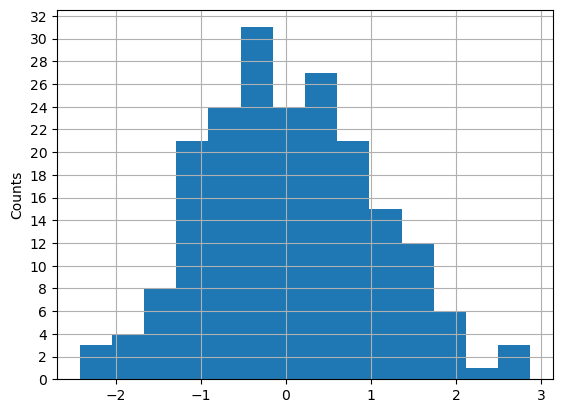

In [44]:
plt.hist(x, int(np.sqrt(N)))
plt.grid()
plt.ylabel('Counts')
counts, bin_edges=np.histogram(x, int(np.sqrt(N)))
yticks=np.arange(0, counts.max()+2, 2)
plt.yticks(yticks)
plt.show()

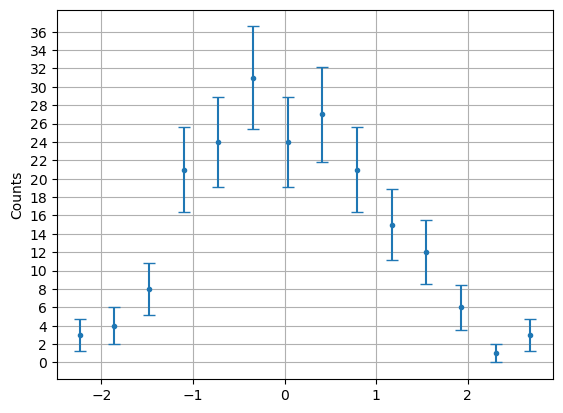

In [45]:
bin_centers=[(bin_edges[i]+bin_edges[i-1])/2 for i in range(1, len(bin_edges))]
y_err=np.sqrt(counts)
plt.errorbar(bin_centers, counts, y_err, fmt='.', capsize=4)
yticks=np.arange(0, counts.max()+int(y_err.max())+2, 2)
plt.grid()
plt.yticks(yticks)
plt.ylabel('Counts')
plt.show()

[[1.33552502e-29 1.81908496e-29 2.47594878e-29 ... 7.49434207e-51
  4.98414365e-51 3.31234305e-51]
 [1.42484125e-20 1.84087777e-20 2.37668237e-20 ... 1.06953248e-64
  6.74696618e-65 4.25315108e-65]
 [3.48203010e-66 5.54517853e-66 8.82442190e-66 ... 9.31805516e-20
  7.24543347e-20 5.62977695e-20]
 ...
 [2.15796420e-43 3.14183918e-43 4.57100173e-43 ... 8.61132650e-36
  6.12161278e-36 4.34859912e-36]
 [5.70370711e-47 8.43337685e-47 1.24604440e-46 ... 1.10064195e-32
  7.94596112e-33 5.73237418e-33]
 [5.08160525e-11 6.11138443e-11 7.34456370e-11 ... 3.58916933e-86
  2.10760253e-86 1.23671946e-86]]


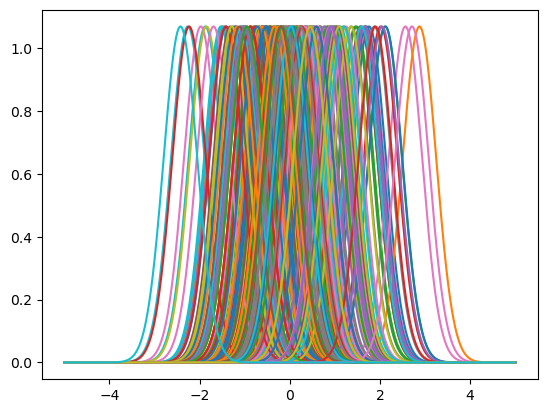

In [46]:
std=1.06 * x.std() * len(x) **(-1/5)

time=np.linspace(-5, 5, 1000)

gaussians=sc.stats.norm(x, std).pdf(time[:, None]).T
print(gaussians)

for i in gaussians:
    plt.plot(time,i)


197.0
197.0


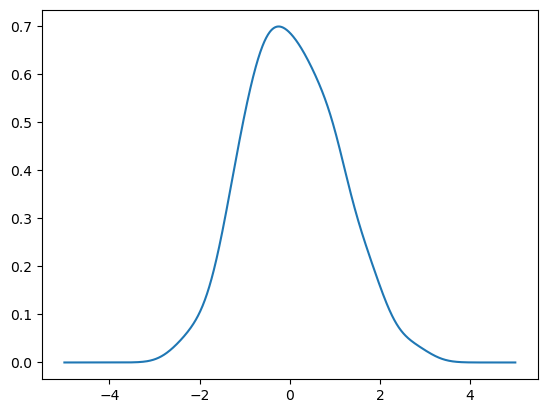

In [47]:
original_integral=sc.integrate.trapz(counts)
print(original_integral)

gaussians_sum=np.sum(gaussians, axis=0)
integral=sc.integrate.trapz(gaussians_sum)
gaussians_sum=gaussians_sum/integral*original_integral

plt.plot(time, gaussians_sum)
integral=sc.integrate.trapz(gaussians_sum)
print(integral)

7.2\. **Color-coded scatter plot** (10 MINUTES)

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
N=100
x_mean=[1,1]
x_std=np.diag([1,1])
y_mean=[-1,-1]
y_std=np.diag([1,1])

x=np.random.multivariate_normal(x_mean, x_std, N)
y=np.random.multivariate_normal(y_mean, y_std, N)

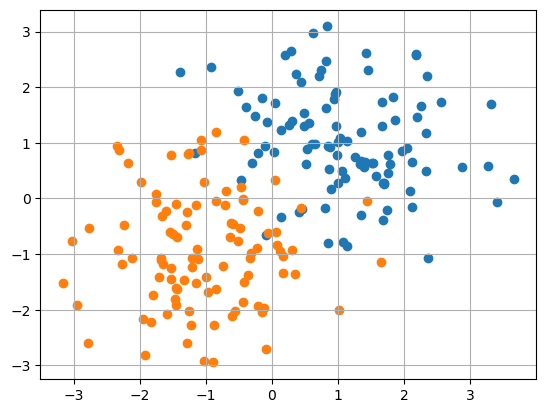

In [50]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(y[:,0], y[:,1])
plt.grid()
plt.show()

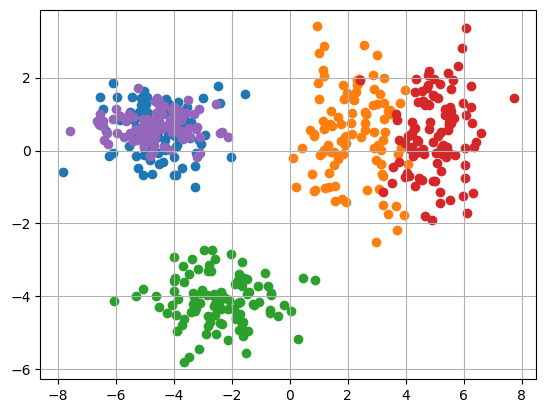

In [18]:
N=100
n=5
data=np.zeros((N,n*2))
for i in range(n):
    mean=np.random.uniform(-5, 5, size=2)
    cov=np.diag(np.random.uniform(-0,2, size=2))
    x=np.random.multivariate_normal(mean, cov, N)
    data[:, i*2]=x[:,0]
    data[:, i*2+1]=x[:,1]

for i in range(n):
    plt.scatter(data[:, 2*i], data[:, 2*i+1])

plt.grid()
plt.show()

# 7.3\. **Profile plot** (30 MINUTES)

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy as sc

In [20]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2023-01-28 15:56:40--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [segue]
--2023-01-28 15:56:41--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc8331e527de07123ca110d5deb6.dl.dropboxusercontent.com/cd/0/inline/B1Zaup-LBZ1XFYNQan0xtaclAhrHJXj1vpm4opdgoJQo-dkWf6iUUVINkqM0JRHwWovxj4VFLksE342Ytghp8GGRuhRdWJu99fvey0kOi8Gnpo6nDuFlnDhkfQeIkNOoH3XwuYNUC7Au0EB8_yk7urWkR4xYxd-zdZKfGxS9BpqPoA/file# [segue]
--2023-01-28 15:56:41--  https://uc8331e527de07123ca110d5deb6.dl.dropboxusercontent.com/cd/0/inline/B1Zaup-LBZ1XFYNQan0xtaclAhrHJXj1vpm4

In [52]:
df=pd.DataFrame(np.load('residuals_261.npy', allow_pickle=True).item())
df

residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]

In [27]:
df=df[np.abs(df['residuals'])<2]
df

residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]

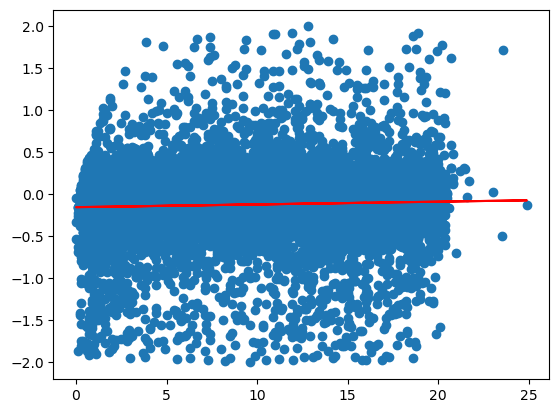

In [57]:
linreg=sc.stats.linregress(df['distances'], df['residuals'])
plt.scatter(df['distances'], df['residuals'])

plt.plot(df['distances'], df['distances']*linreg.slope+linreg.intercept, color='r')
plt.show()

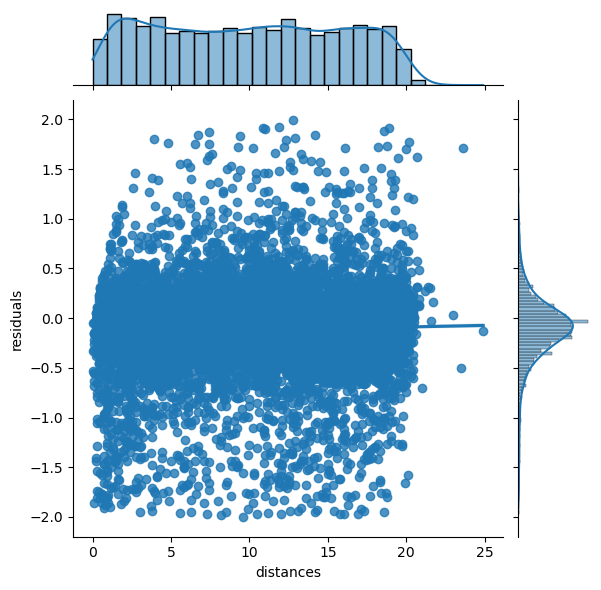

In [49]:
jp=sns.jointplot(x=df['distances'], y=df['residuals'], kind='reg')

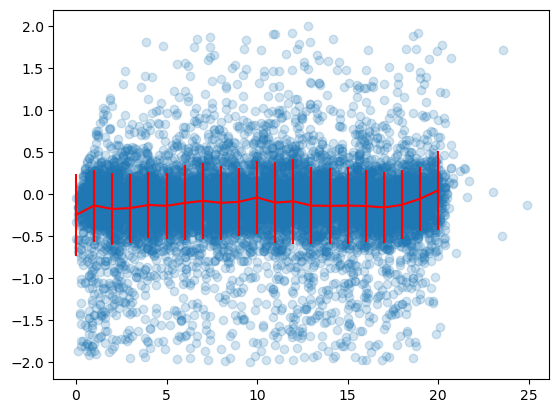

In [73]:
x=np.linspace(0,20,21)

y=np.zeros_like(x)
err_y=np.zeros_like(x)


for i in x:
    y[int(i)]=np.mean(df[(df['distances']>=i) & (df['distances']< i+1)]['residuals'])
    err_y[int(i)]=np.std(df[(df['distances']>=i) & (df['distances']< i+1)]['residuals'])

plt.errorbar(x,y,err_y, color='r')
plt.scatter(df['distances'], df['residuals'], alpha=0.2)
plt.show()



LINEAR ALGEBRA

8.1\. **PCA on 3D dataset** (45 MINUTES)

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [53]:
import numpy as np
from scipy import linalg as la
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
N=1000
x1=np.random.normal(0, 1, N)
x2=np.random.normal(0, 3, N)+x1
x3=2*x1+x2

In [55]:
#COVARIANCE MATRIX
cov=np.cov([x1,x2,x3])
print(cov)

l, V= la.eig(cov)
print(l)
print(V)


[[ 1.08562974  1.18120035  3.35245983]
 [ 1.18120035  9.73712065 12.09952134]
 [ 3.35245983 12.09952134 18.80444099]]
[ 2.76350065e+01+0.j -6.89397745e-16+0.j  1.99218484e+00+0.j]
[[-0.12821858 -0.81649658  0.56293279]
 [-0.56123046 -0.40824829 -0.71996785]
 [-0.81766763  0.40824829  0.40589774]]


In [56]:
#SVD
U, spectrum, Vt = la.svd([x1,x2,x3])

l_svd = spectrum**2/(N-1)
V_svd = U

print(l_svd)
print(V_svd)

[2.77517529e+01 1.99322388e+00 1.25685581e-31]
[[-0.12845981  0.56287779 -0.81649658]
 [-0.56092188 -0.72020829 -0.40824829]
 [-0.8178415   0.40554729  0.40824829]]


In [57]:
V_trace=np.abs(l).sum()
print(V_trace)
print((l[0])/V_trace)
print((l[0]+l[2])/V_trace)
#the first component has 92% of the variance
#first and second component has more the 99% of the variance

29.62719138172218
(0.9327582284081753+0j)
(1+0j)


In [58]:
X=pd.DataFrame([x1, x2, x3]).T
X_new=pd.DataFrame(np.dot(X,V)) #dati nella nuova base
print(X)

            0         1         2
0    1.079334 -2.655519 -0.496851
1   -0.337884  2.356722  1.680953
2    0.749819  3.022651  4.522288
3    0.434326  1.143937  2.012589
4    0.067208  2.815158  2.949575
..        ...       ...       ...
995  0.542656  4.357315  5.442628
996 -0.244818 -4.335117 -4.824753
997 -0.353098 -0.052745 -0.758941
998 -0.375384 -2.707351 -3.458118
999 -0.071771  1.418859  1.275316

[1000 rows x 3 columns]


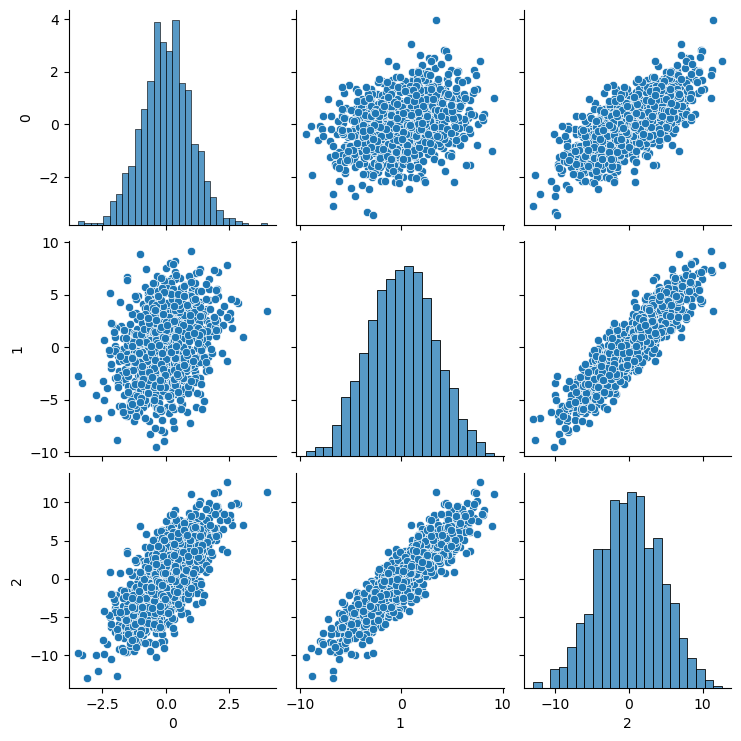

In [59]:
sns.pairplot(X)
plt.show()

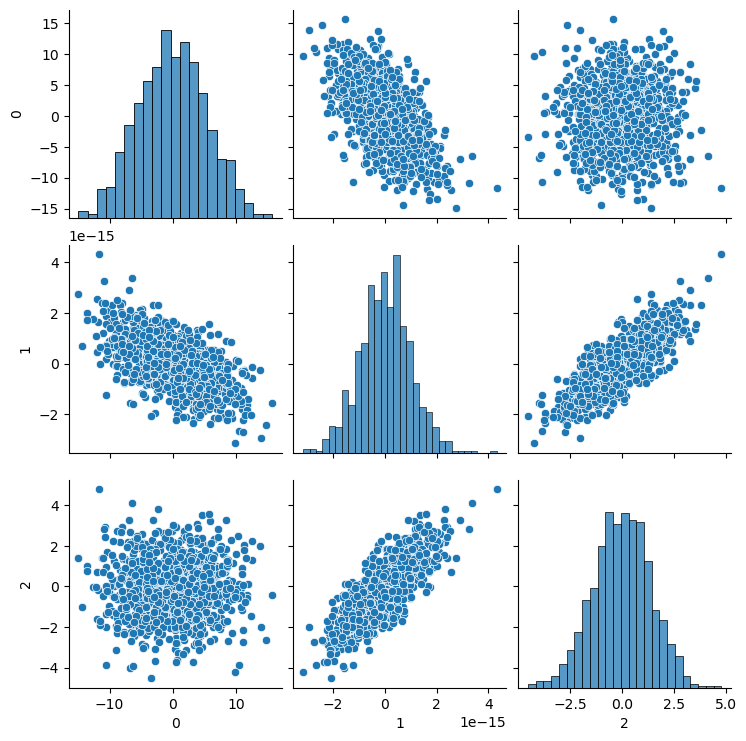

In [56]:
sns.pairplot(X_new)
plt.show()

8.3 \. **Looking at an oscillating spring** (60 MINUTES)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [59]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt

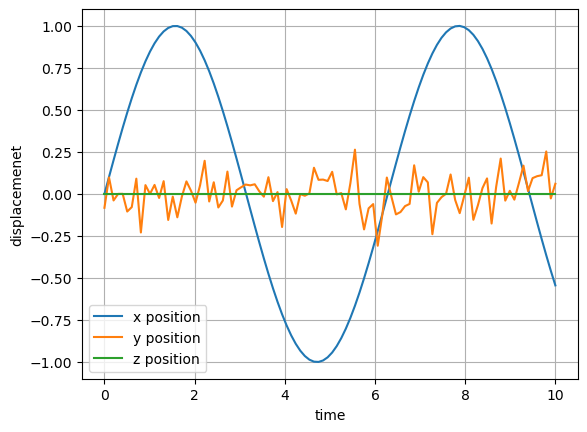

In [60]:
time=np.linspace(0, 10, 100) #times
w=1 #spring frequency
A=1 #amplitude
mean=0 #gaussian noise along y
std=0.1 #gaussian noise along y

x=np.sin(w*time)
y=np.random.normal(mean, std, len(time))
z=np.zeros(len(time))

X0=np.array([x,y,z]).T

#plot
plt.plot(time, X0[:,0])
plt.plot(time, X0[:,1])
plt.plot(time, X0[:,2] )
plt.legend(['x position', 'y position', 'z position'])
plt.grid()
plt.xlabel('time')
plt.ylabel('displacemenet')
plt.show()

In [61]:
n=10 #number of cameras
theta=np.random.uniform(0, np.pi/2, n)
phi=np.random.uniform(0, np.pi, n)

def rotation(theta, phi):
    out=np.array([[np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)],
     [np.cos(theta)*np.cos(phi), np.cos(theta)*np.sin(phi), -np.sin(theta)],
     [-np.sin(phi), np.cos(phi), 0]])
    return out

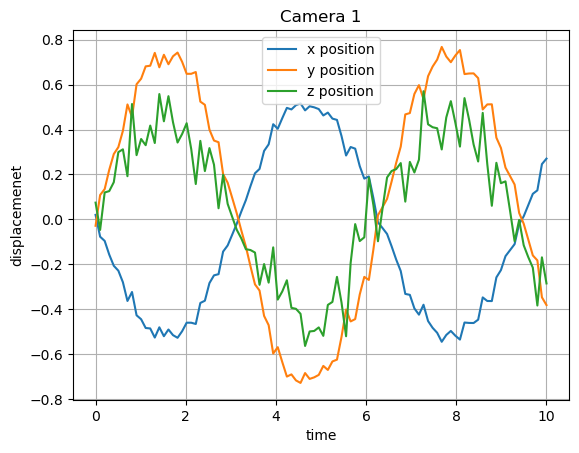

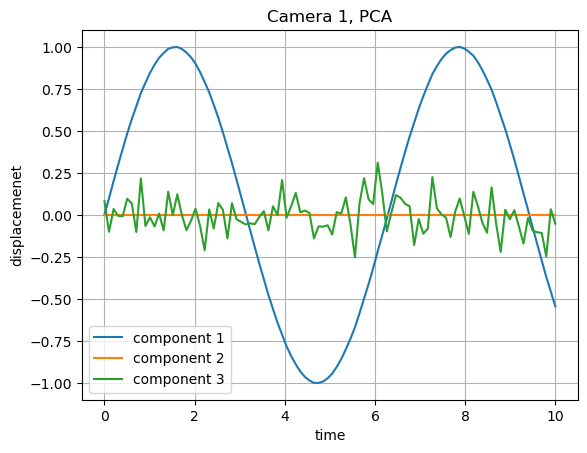

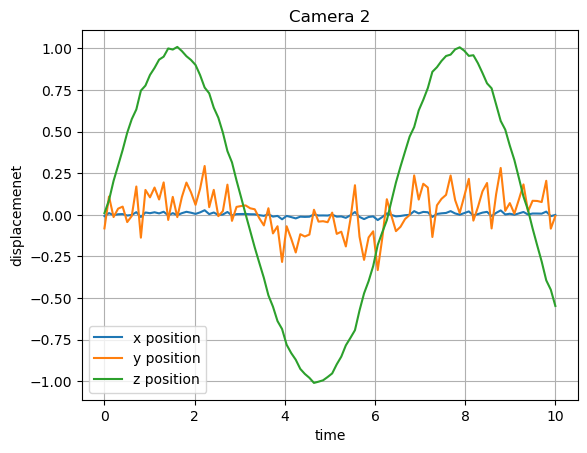

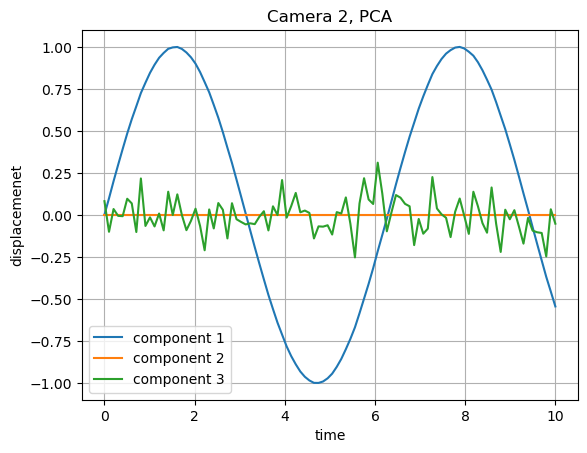

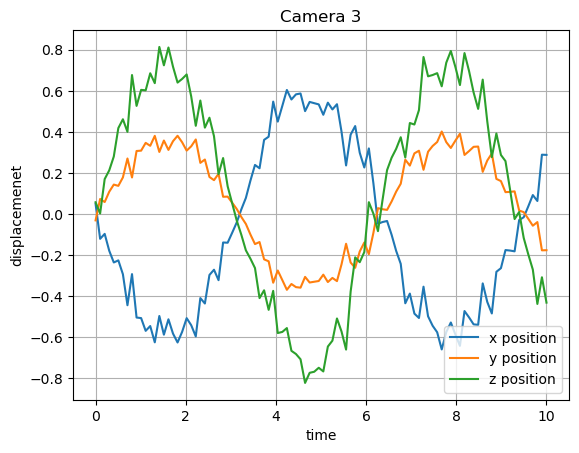

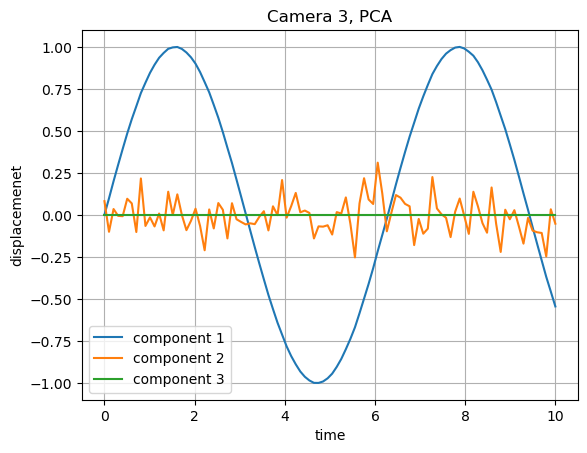

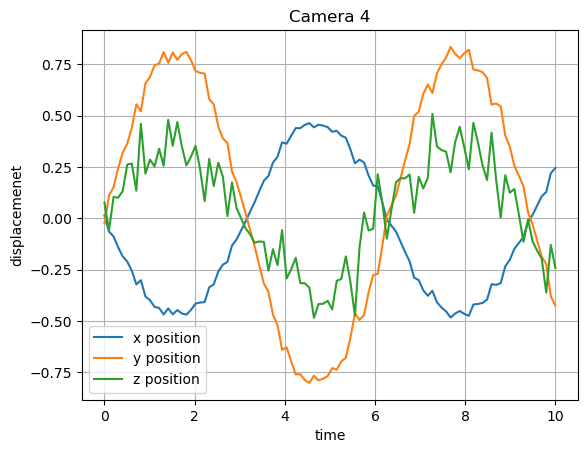

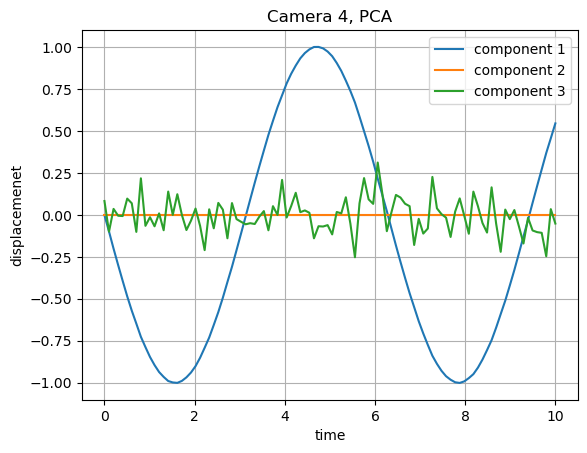

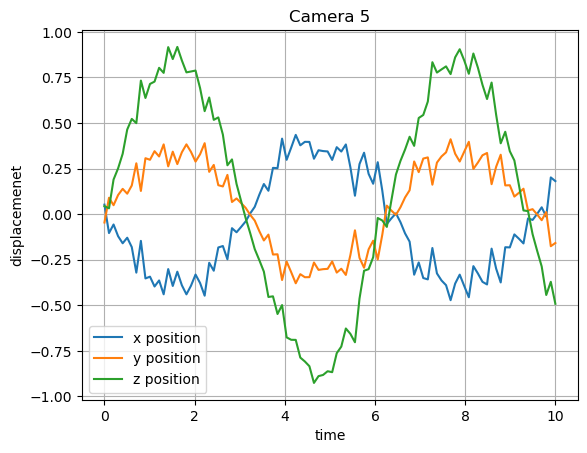

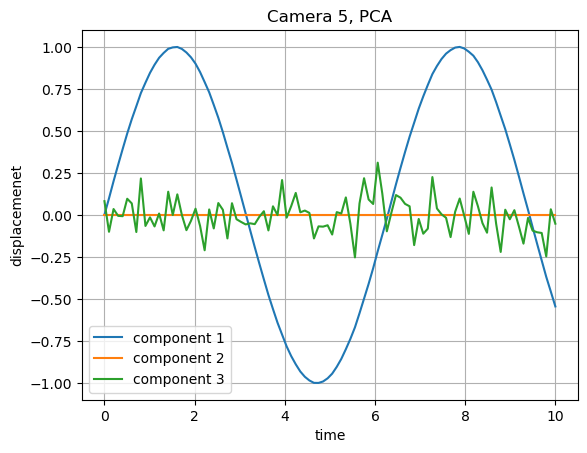

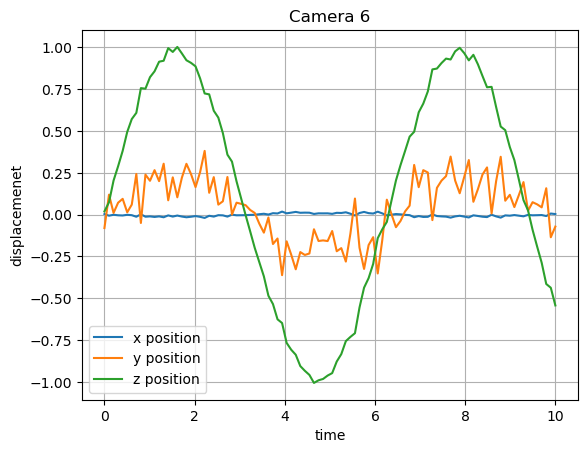

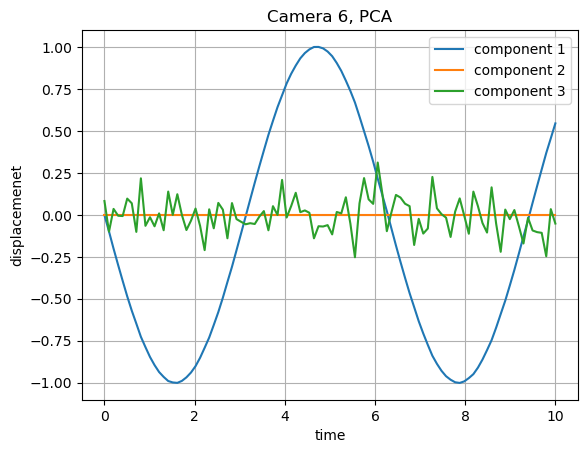

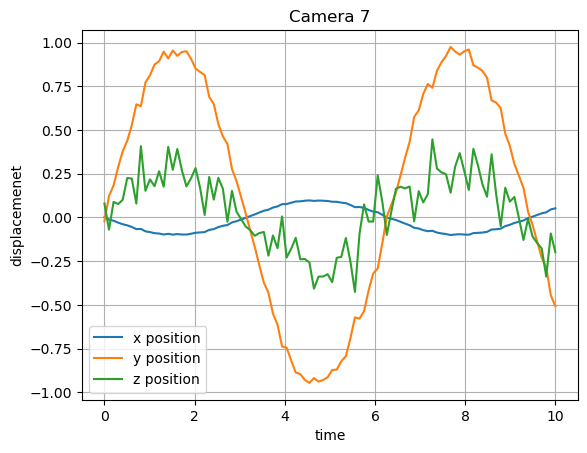

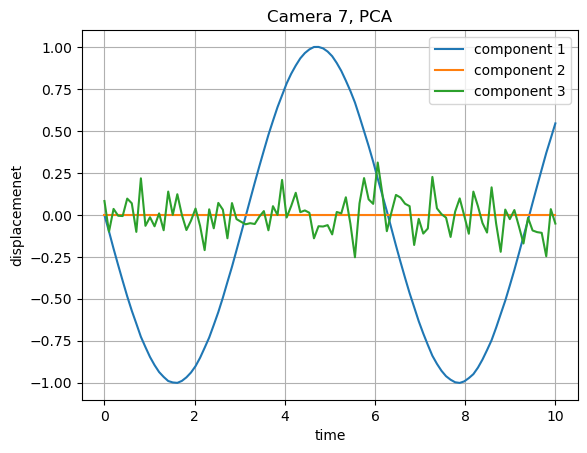

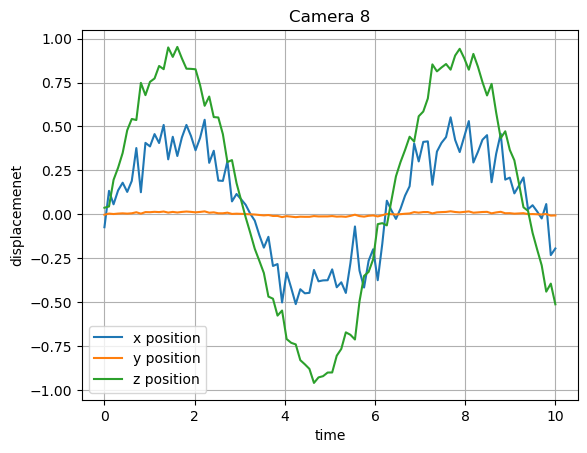

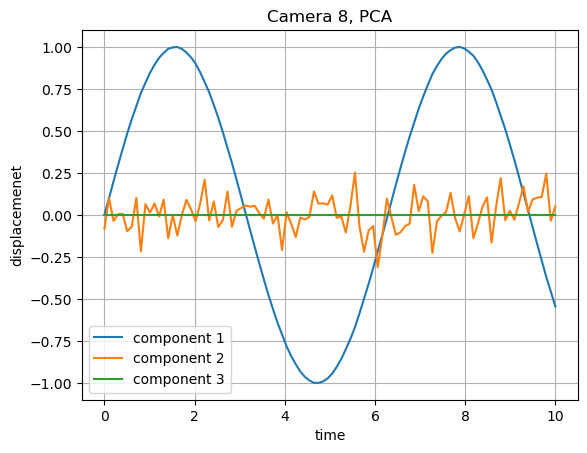

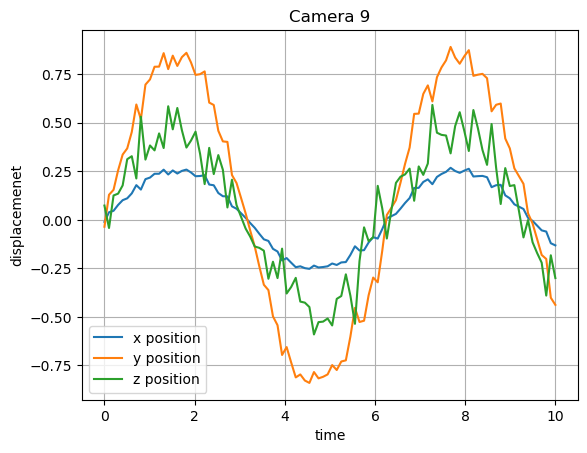

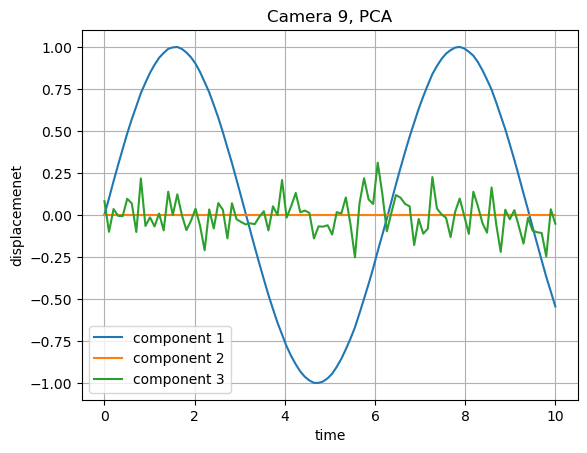

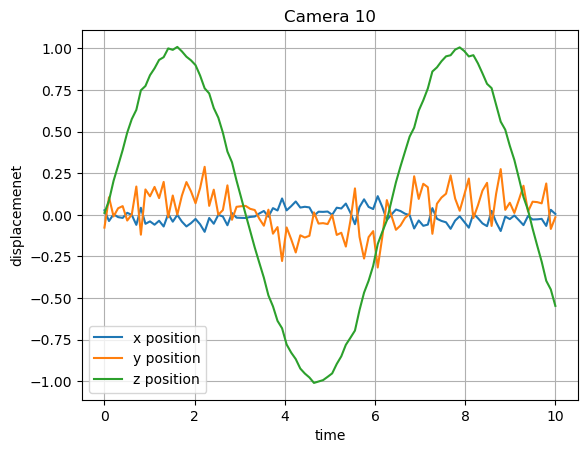

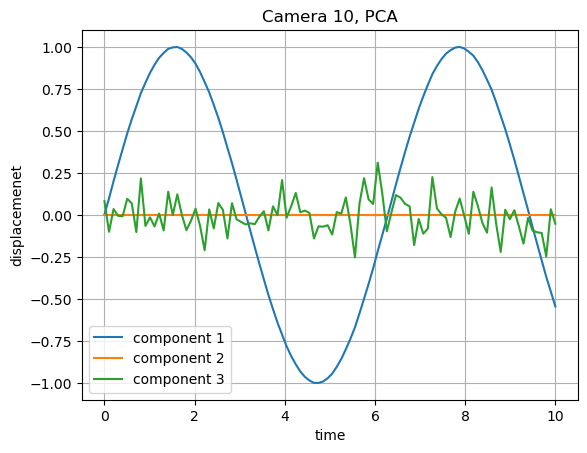

In [62]:
for i in range(n):
    X_mod=np.dot(X0, rotation(theta[i], phi[i]))
    
    #plot
    plt.plot(time, X_mod[:,0])
    plt.plot(time, X_mod[:,1])
    plt.plot(time, X_mod[:,2] )
    plt.legend(['x position', 'y position', 'z position'])
    plt.grid()
    plt.title('Camera {}'.format(i+1))
    plt.xlabel('time')
    plt.ylabel('displacemenet')
    plt.show()
    
    #PCA
    cov=np.cov(X_mod.T)
    l, V=sc.linalg.eig(cov)
    X_mod_PCA=np.dot(X_mod, V)
        
    #plot
    plt.plot(time, X_mod_PCA[:,0])
    plt.plot(time, X_mod_PCA[:,1])
    plt.plot(time, X_mod_PCA[:,2] )
    plt.legend(['component 1', 'component 2', 'component 3'])
    plt.grid()
    plt.title('Camera {}, PCA'.format(i+1))
    plt.xlabel('time')
    plt.ylabel('displacemenet')
    plt.show()

ALGORITHMS

9.1\. **Maximum wind speed prediction at the Sprogø station** (30 MINUTES)

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [63]:
import numpy as np
import scipy as sc

In [64]:
max_speeds=np.load('max-speeds.npy')
years_nb=max_speeds.shape[0]

In [65]:
N=21 #numero di mesi misurati
cprob=np.array([i/(N+1) for i in range (1,22)])
print(cprob)

max_speeds.sort()
print(max_speeds)

[0.04545455 0.09090909 0.13636364 0.18181818 0.22727273 0.27272727
 0.31818182 0.36363636 0.40909091 0.45454545 0.5        0.54545455
 0.59090909 0.63636364 0.68181818 0.72727273 0.77272727 0.81818182
 0.86363636 0.90909091 0.95454545]
[22.46 23.2  23.34 23.85 24.16 25.28 25.79 26.19 26.37 26.65 26.65 26.68
 26.73 26.75 26.76 27.93 28.09 28.79 29.75 30.19 32.97]


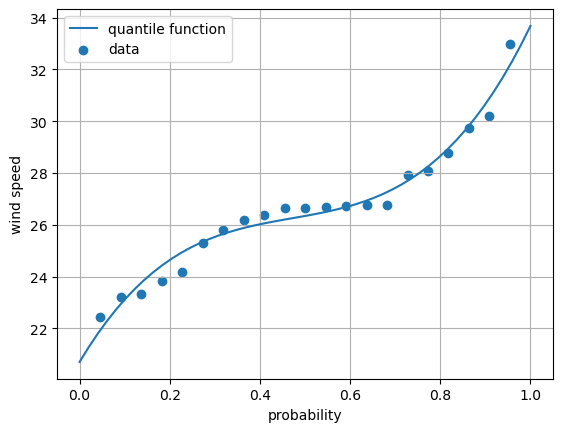

In [66]:
quantile_function=sc.interpolate.UnivariateSpline(cprob, max_speeds)
x=np.linspace(0, 1)
plt.plot(x, quantile_function(x))
plt.scatter(np.arange(1,22)/22,max_speeds)
plt.xlabel('probability')
plt.ylabel('wind speed')
plt.legend(['quantile function','data'])
plt.grid()
plt.show()

In [67]:
fifty_prob=1-0.02
fifty_wind=quantile_function(fifty_prob)
print(fifty_wind)

32.97989844019469


9.2\. **Curve fitting of temperature in Alaska** (20 MINUTES)

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [68]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [69]:
max=[17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months=np.arange(1, 13)

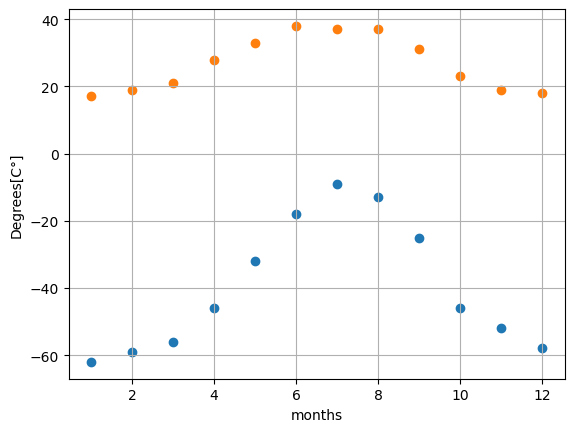

In [70]:
fig=plt.figure()
plt.scatter(months, min)
plt.scatter(months, max)
plt.grid()
plt.xlabel('months')
plt.ylabel('Degrees[C°]')
plt.show()

In [71]:
def function(x, A, mean, std, q):
    out=A*np.exp(-(x-mean)**2/(2*std**2))+q
    return out

In [72]:
min_params, min_cov=sc.optimize.curve_fit(function, months, min, [60, 7, 2, -60])
max_params, max_cov=sc.optimize.curve_fit(function, months, max, [20, 7, 3, 20])

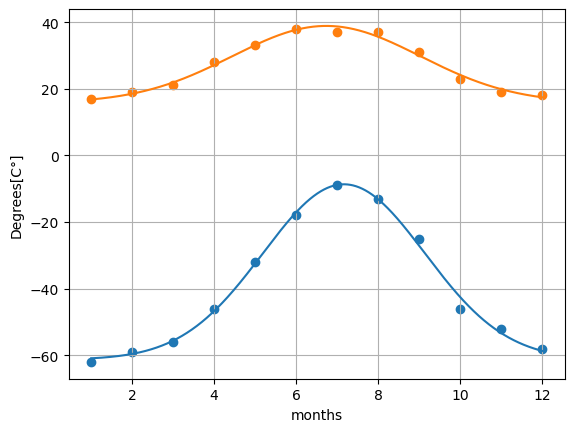

In [73]:
x=np.linspace(1, 12, 1000)

plt.scatter(months, min)
plt.scatter(months, max)
plt.grid()
plt.xlabel('months')
plt.ylabel('Degrees[C°]')
plt.plot(x, function(x, min_params[0], min_params[1], min_params[2], min_params[3]))
plt.plot(x, function(x, max_params[0], max_params[1], max_params[2], max_params[3]))
plt.show()

In [74]:
%precision 3
print(min_params[1], '+-', min_cov[1,1])
print(max_params[1], '+-', max_cov[1,1])
print((min_params[1]-3*min_cov[1,1])<(max_params[1]+3*max_cov[1,1]))

7.164525927729588 +- 0.002228501448369496
6.735816676617544 +- 0.006315104210520545
False


9.3\. **2D minimization of a six-hump camelback function** (20 MINUTES)

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


In [75]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [76]:
def function(x):
    out=(4-2.1*x[0]**2+(x[0]**4)/3)* x[0]**2 +x[0]*x[1] + (4*x[1]**2 -4)*x[1]**2
    return out

In [77]:
x=np.linspace(-2,2,1000)
y=np.linspace(-1,1,1000)
X,Y=np.meshgrid(x,y)
Z=function([X,Y])
print([X,Y])

[array([[-2.   , -1.996, -1.992, ...,  1.992,  1.996,  2.   ],
       [-2.   , -1.996, -1.992, ...,  1.992,  1.996,  2.   ],
       [-2.   , -1.996, -1.992, ...,  1.992,  1.996,  2.   ],
       ...,
       [-2.   , -1.996, -1.992, ...,  1.992,  1.996,  2.   ],
       [-2.   , -1.996, -1.992, ...,  1.992,  1.996,  2.   ],
       [-2.   , -1.996, -1.992, ...,  1.992,  1.996,  2.   ]]), array([[-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [-0.998, -0.998, -0.998, ..., -0.998, -0.998, -0.998],
       [-0.996, -0.996, -0.996, ..., -0.996, -0.996, -0.996],
       ...,
       [ 0.996,  0.996,  0.996, ...,  0.996,  0.996,  0.996],
       [ 0.998,  0.998,  0.998, ...,  0.998,  0.998,  0.998],
       [ 1.   ,  1.   ,  1.   , ...,  1.   ,  1.   ,  1.   ]])]


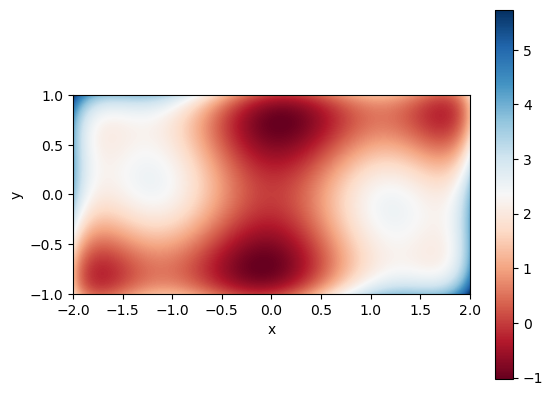

In [78]:
plt.imshow(Z, cmap=plt.cm.RdBu, extent=[-2, 2, -1, 1])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [79]:
minima=[]
for x0 in np.linspace(-2,2, 10):
    for y0 in np.linspace(-1,1, 10):
        minima.append(sc.optimize.minimize(function, [x0,y0]).x)

minima=np.array(minima)
f_min=function([minima[:,0], minima[:,1]])
ind_min=np.argmin(f_min)
print('The global minima is in:', minima[ind_min])


The global minima is in: [-0.09   0.713]


In [81]:
f_loc_min=[]
loc_min=[]
eps=1e-5
for i in range(len(f_min)):
    out=1
    for j in range(len(f_loc_min)):
        if np.abs(f_min[i]-f_loc_min[j])>eps:
            out=out*1
        else:
            out=out*0
    if out==1:
        f_loc_min.append(f_min[i])
        loc_min.append(minima[i])

print(f_loc_min)
print(loc_min)
#ci sono tre minimi locali

[-1.0316284534896594, -0.21546382438372014, 2.1042503103118007]
[array([ 0.09 , -0.713]), array([-1.704,  0.796]), array([-1.607, -0.569])]


9.5\. **FFT of an image** (30 MINUTES)

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

In [82]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

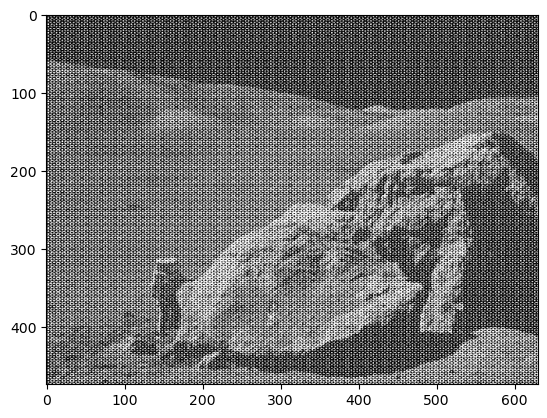

In [83]:
image=plt.imread('moonlanding.png')
plt.imshow(image, plt.cm.gray)
plt.show()

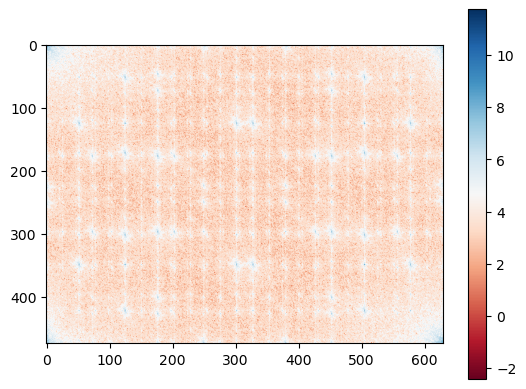

In [84]:
fourier_transform=sc.fftpack.fft2(image)
plt.imshow(np.log(np.abs(fourier_transform)), cmap=plt.cm.RdBu)
plt.colorbar()
plt.show()

/tmp/ipykernel_3903/4135934246.py:10: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(fourier_transform_modified)), cmap=plt.cm.RdBu)


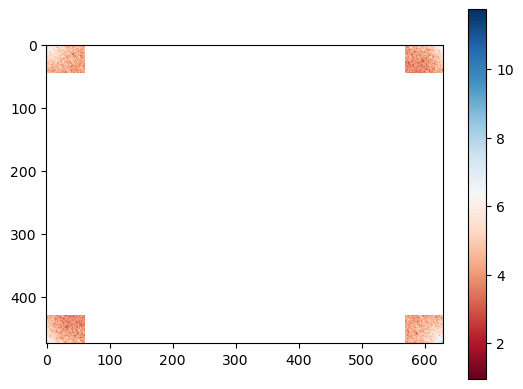

In [85]:
r=0.1
c=0.1
R=474
C=630

fourier_transform_modified=fourier_transform
fourier_transform_modified[int(r*R):int((1-r*R)),:]=0
fourier_transform_modified[:,int(c*C):int((1-c*C))]=0

plt.imshow(np.log(np.abs(fourier_transform_modified)), cmap=plt.cm.RdBu)
plt.colorbar()
plt.show()

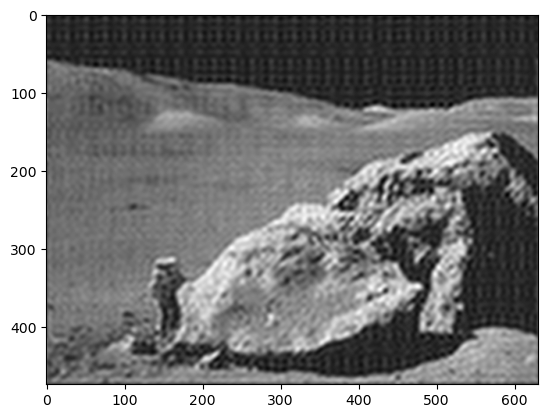

In [86]:
image_modified=sc.fftpack.ifft2(fourier_transform_modified)
plt.imshow(np.abs(image_modified), plt.cm.gray)
plt.show()

MONTE CARLO

10.1\. **Radioactive decay chain** (30 MINUTES)

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [87]:
import numpy as np

In [88]:
tau=3.052*60 #s
n_Ti=1000
n_Pb=0

def p(t):
    return 1-2**(-t/tau)

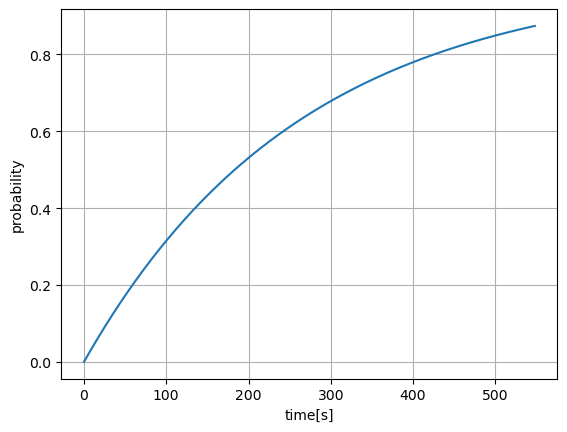

In [89]:
time=np.arange(int(3*tau))
plt.plot(time, p(time))
plt.grid()
plt.xlabel('time[s]')
plt.ylabel('probability')
plt.show()

In [90]:
Ti=[]
Pb=[]
p_1=p(1)

for t in time:
    Ti.append(n_Ti)
    Pb.append(n_Pb)
    for k in range(n_Ti):
        if np.random.uniform(0,1)<p_1:
            n_Ti-=1
            n_Pb+=1        

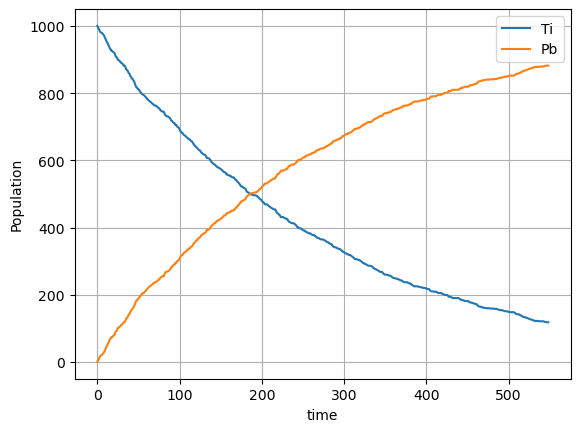

In [91]:
plt.plot(time, Ti)
plt.plot(time, Pb)
plt.grid()
plt.xlabel('time')
plt.ylabel('Population')
plt.legend(['Ti', 'Pb'])
plt.show()

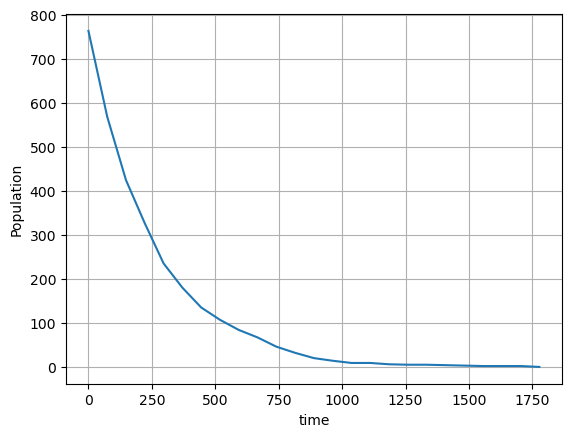

In [92]:
def pp(t):
    return 2**(-t/tau)*np.log(2)/tau

def ipp(z):
    return -tau*np.log2(1-z)

z=np.random.random(1000)

times=ipp(z)
counts, bin_edges=np.histogram(times, bins=25)
Ti=np.array([1000-np.cumsum(counts)[i] for i in range(len(counts))])
plt.plot(np.arange(len(counts))*times.max()/25, Ti)
plt.grid()
plt.ylabel('Population')
plt.xlabel('time')
plt.show()


10.2\. **Rutherford Scattering** (30 MINUTES)

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [93]:
import numpy as np

In [94]:
E = 7.7 * 10**6 #eV
a0 = 137 * 2 *10**(-6)
sigma = a0/100.
Z = 79
e = 1
ep0 = 1./(4*np.pi)

K = Z*e**2 /(2*np.pi*ep0*E)

[[2.74e-06 0.00e+00]
 [0.00e+00 2.74e-06]]


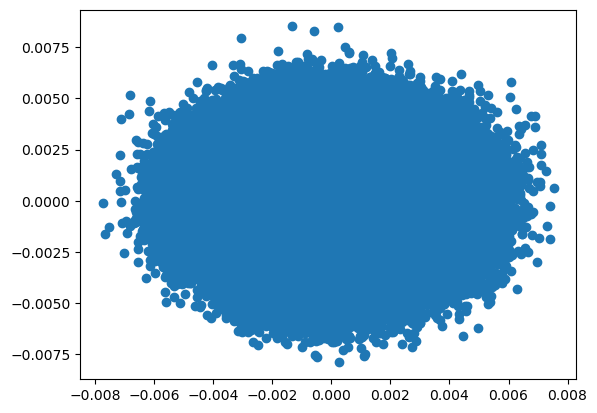

In [95]:
std=np.diag([a0/100, a0/100])
print(std)
mean=[0,0]
N=1*10**6
beam=np.random.multivariate_normal(mean, std, N)

plt.scatter(beam[:,0], beam[:,1])


In [96]:
b=np.sqrt(beam[:,0]**2+beam[:,1]**2)

bounce = (b<=K)
n = bounce.sum()
print(bounce.sum())
print(n/1000000)



77
7.7e-05


10.3\. **Monte Carlo integration: hit/miss vs mean value method** (30 MINUTES)

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [98]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

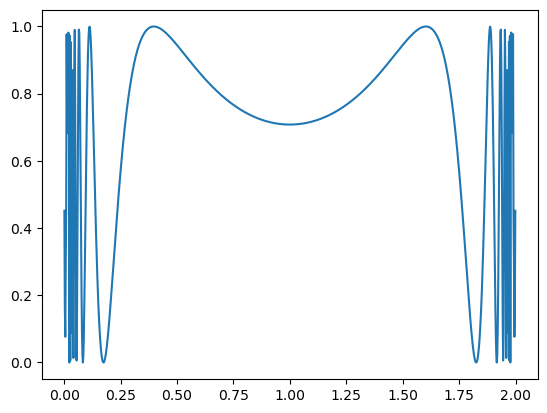

In [99]:
x=np.linspace(0.001,1.999, 1000)
plt.plot(x, f(x))

In [100]:
#Hit-miss method
N=1000000
y=np.random.uniform(0,1, N)
k=0
A=2*1
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<=f(x):
        k+=1

I=k*A/N
print(I)

1.45184


In [101]:
I2, err=sc.integrate.quad(f, 0.0001, 1.9999)
print('Error:', np.abs(I2-I))

Error: 0.0008999678174936854


/tmp/ipykernel_3903/3288456846.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I2, err=sc.integrate.quad(f, 0.0001, 1.9999)


In [102]:
#Mean-value method
a=0
b=2
N=1000000
x=np.random.random(N)
f_value=f(x)
I3=(b-a)/N*np.sum(f_value)
print(I3)
print('Error:', np.abs(I2-I3))

1.4508426197479096
Error: 9.74124345967109e-05


10.4\. **Monte Carlo integration in high dimension** (30 MINUTES)

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [103]:
import numpy as np

In [104]:
def f(x):
    if x[0]**2+x[1]**2<=1:
        out=1
    else:
        out=0
    return out

In [105]:
N=100000
x=np.random.random(N)*2-1
y=np.random.random(N)*2-1
z=[x,y]
f_sum=0
for i in range(N):
    f_sum=f_sum+f([x[i],y[i]])

I=4/N*f_sum
print(I)

3.14964


In [106]:
N=10000
n=10 #numero di dimensioni

def f(x):
    x2=[i**2 for i in x]
    if np.sum(x2)<=1:
        out=1
    else:
        out=0
    return out

f_sum=0
for i in range(N):
    x=np.random.uniform(-1,1,n)
    f_sum=f_sum+f(x)

I=2**n/N*f_sum
print(I)

2.7648


10.5\. **Monte Carlo integration with importance sampling**  (30 MINUTES)

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [107]:
import numpy as np

In [108]:
def f(x):
    out=x**(-1/2)/(np.exp(x)+1)
    return out

def w(x):
    out=1/np.sqrt(x)
    return out
    
def I_w(x):
    out=2*np.sqrt(x)
    return out

In [109]:
N=10000000
x=np.random.random(N)
f_value=f(x)
w_value=w(x)
Iw=I_w(1)-I_w(0)

I=1/N*(f_value/w_value).sum()*Iw
print(I)

0.7597599771094907
